In [ ]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 115 kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# EDA

In [ ]:
# Import for Visualization 
import matplotlib.pyplot as plt # graphically presentation of dataset

# Import for Count and Percent Graphs
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
dfmetadata_recreated = pd.read_csv("/content/gdrive/MyDrive/DBP_FALL2022/dbm_movies_final.tsv", sep="\t")

In [ ]:
dfmetadata_recreated.head(5)

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,...,vote_average,vote_count,keywords,crew,year,month,day,day_name,characters,actors
0,False,30000000,"Animation, Comedy, Family",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.95,Pixar Animation Studios,United States of America,...,7.7,5416.0,"jealousy, toy, boy, friendship, friends, rival...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...",1995,10,30,Monday,"Woody (voice), Buzz Lightyear (voice), Mr. Pot...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,False,65000000,"Adventure, Fantasy, Family",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.02,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,...,6.9,2412.0,"board game, disappearance, based on children's...","Larry J. Franco, Jonathan Hensleigh, James Hor...",1995,12,15,Friday,"Alan Parrish, Samuel Alan Parrish / Van Pelt, ...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,False,0,"Romance, Comedy",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.71,"Warner Bros., Lancaster Gate",United States of America,...,6.5,92.0,"fishing, best friend, duringcreditsstinger, ol...","Howard Deutch, Mark Steven Johnson, Mark Steve...",1995,12,22,Friday,"Max Goldman, John Gustafson, Ariel Gustafson, ...","Walter Matthau, Jack Lemmon, Ann-Margret, Soph..."
3,False,16000000,"Comedy, Drama, Romance",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.86,Twentieth Century Fox Film Corporation,United States of America,...,6.1,34.0,"based on novel, interracial relationship, sing...","Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...",1995,12,22,Friday,"Savannah 'Vannah' Jackson, Bernadine 'Bernie' ...","Whitney Houston, Angela Bassett, Loretta Devin..."
4,False,0,Comedy,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.39,"Sandollar Productions, Touchstone Pictures",United States of America,...,5.7,173.0,"baby, midlife crisis, confidence, aging, daugh...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...",1995,2,10,Friday,"George Banks, Nina Banks, Franck Eggelhoffer, ...","Steve Martin, Diane Keaton, Martin Short, Kimb..."


In [ ]:
#@title Compare budget and revenue


In [ ]:
dfmovies_cost = dfmetadata_recreated[(dfmetadata_recreated['budget'] != 'unknown') & 
                                     (dfmetadata_recreated['revenue'] != 'unknown') ][['original_title', 'budget', 'revenue', 'year']]

dfmovies_cost['budget'] = dfmovies_cost['budget'].astype(float).astype(int)
dfmovies_cost['revenue'] = dfmovies_cost['revenue'].astype(float).astype(int)

print("Shape: ", dfmovies_cost.shape)
dfmovies_cost.info()

Shape:  (43287, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43287 entries, 0 to 43286
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original_title  43287 non-null  object
 1   budget          43287 non-null  int64 
 2   revenue         43287 non-null  int64 
 3   year            43287 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ MB


In [ ]:
dfmovies_cost = dfmovies_cost[(dfmovies_cost['budget'] > 1000000 ) &
                              (dfmovies_cost['revenue'] > 1000000 ) ][['original_title', 'budget', 'revenue', 'year']]
print("Shape: ", dfmovies_cost.shape)
dfmovies_cost

Shape:  (4328, 4)


,original_title,budget,revenue,year
0,Toy Story,30000000,373554050,1995
1,Jumanji,65000000,262797250,1995
3,Waiting to Exhale,16000000,81452160,1995
5,Heat,60000000,187436820,1995
8,Sudden Death,35000000,64350172,1995
...,...,...,...,...
42982,The Emoji Movie,50000000,66913940,2017
43007,Wind River,11000000,184770200,2017
43086,சிவாஜி,12000000,19000000,2007
43240,Про любоff,2000000,1268793,2010


In [ ]:
dfmovies_cost_year = dfmovies_cost.groupby(['year']).sum()
dfmovies_cost_year

,budget,revenue
year,,
1925,3900000,9000000
1930,3950000,8000000
1933,2294280,10240000
1935,1950000,4460000
1936,2419000,7292000
...,...,...
2013,8123227449,23543498917
2014,6637382637,22557495883
2015,6271557666,23827635965


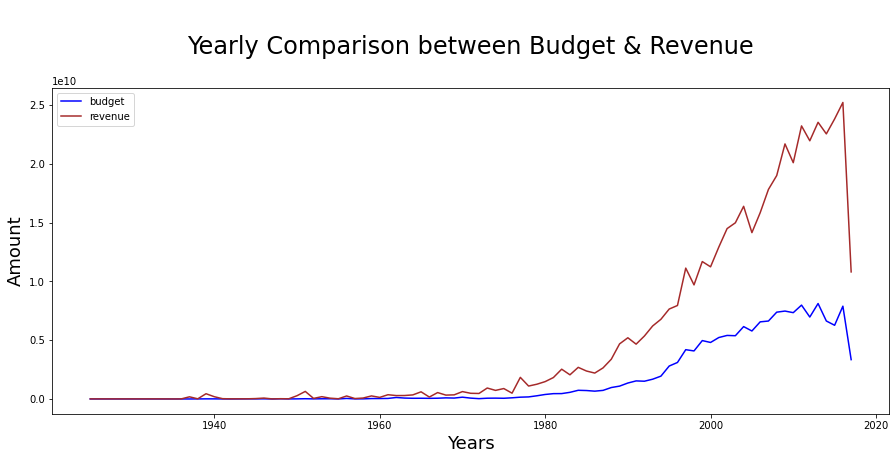

In [ ]:
marker_color=['blue', 'brown' ]
dfmovies_cost_year.plot.line(figsize=(15,6), color= marker_color)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Amount', fontsize=18)
plt.title('\nYearly Comparison between Budget & Revenue\n', fontsize=24)
plt.savefig('budgetandrevenue.pdf')
plt.show()

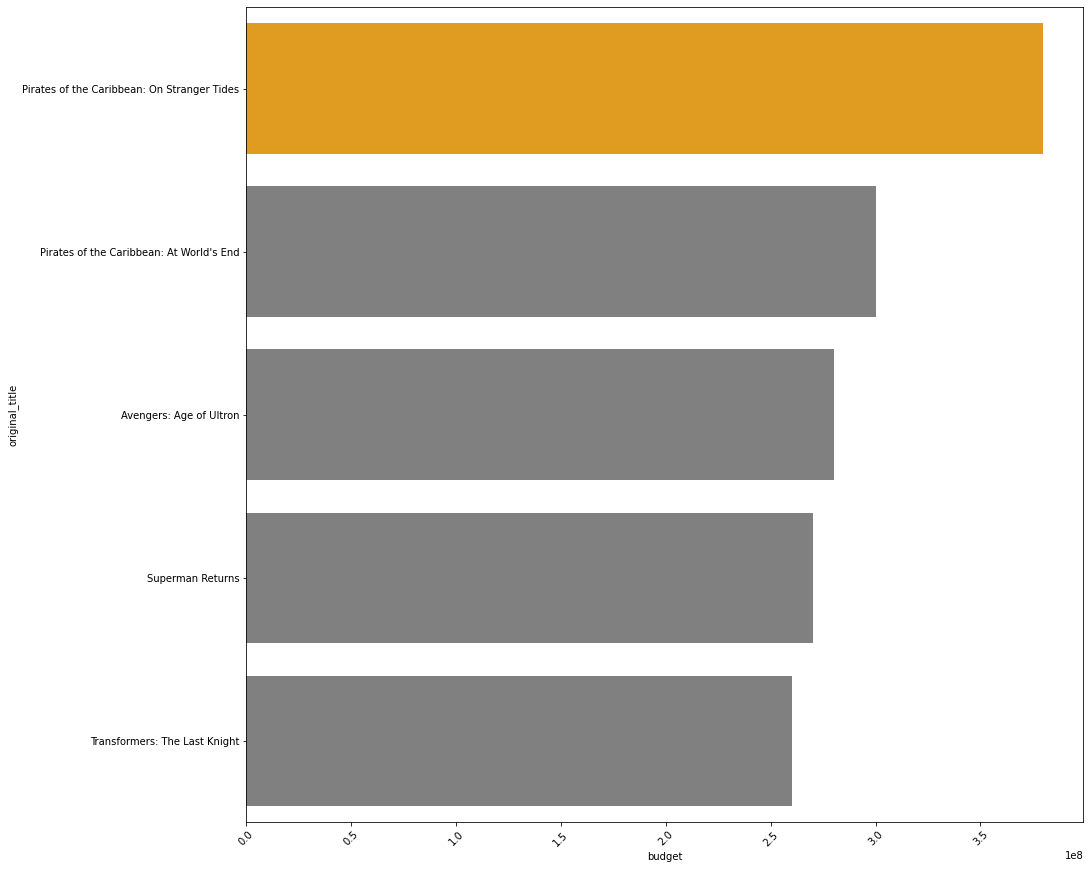

In [ ]:
import seaborn as sns
dfmoviesby_budget = dfmovies_cost.sort_values('budget', ascending=False)

values = dfmoviesby_budget.budget
plt.figure(figsize=(15,15))
clrs = ['grey' if (x < max(values)) else 'orange' for x in values ]
sns.barplot(y='original_title', x='budget', data=dfmoviesby_budget.head(5) , palette=clrs )
plt.xticks(rotation=45)
plt.savefig('top5_budget.pdf')
plt.show()

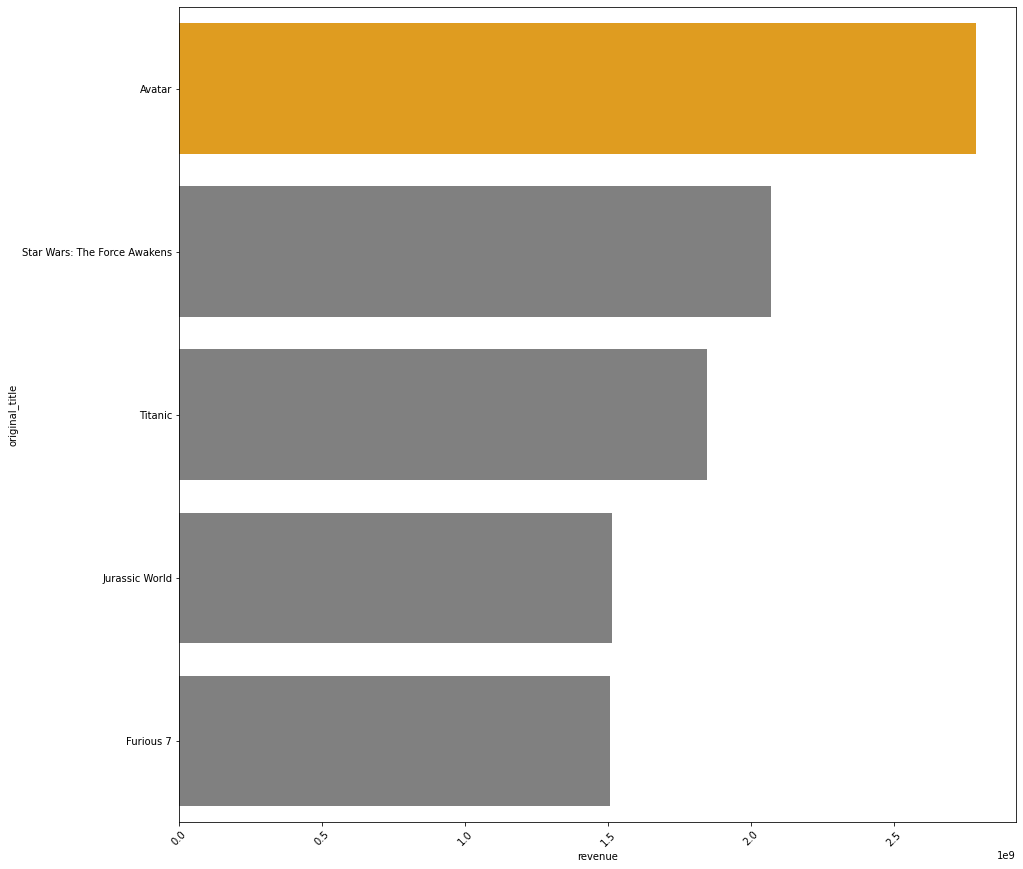

In [ ]:
dfmoviesby_revenue = dfmovies_cost.sort_values('revenue', ascending=False)
dfmoviesby_revenue.head(3)


values = dfmoviesby_revenue.revenue
plt.figure(figsize=(15,15))
clrs = ['grey' if (x < max(values)) else 'orange' for x in values ]
sns.barplot(y='original_title', x='revenue', data=dfmoviesby_revenue.head(5), palette=clrs )
plt.xticks(rotation=45)
plt.savefig('top5_revenue.pdf')
plt.show()

In [ ]:
#@title Văn bản tiêu đề mặc định


In [ ]:
xdfmetadata = dfmetadata_recreated

In [ ]:
dfmetadata_revenue = xdfmetadata[ xdfmetadata['revenue'] > 1000000][['revenue', 'year', 'month', 'day_name']]
xdf_revenue_year = dfmetadata_revenue.groupby(['year']).agg({'revenue':sum}).sort_values('revenue', ascending=False).reset_index()
xdf_revenue_month = dfmetadata_revenue.groupby(['month']).agg({'revenue':sum}).sort_values('revenue', ascending=False).reset_index()
xdf_revenue_dayname = dfmetadata_revenue.groupby(['day_name']).agg({'revenue':sum}).sort_values('revenue', ascending=False).reset_index()

In [ ]:
figKill = [go.Bar(y = xdf_revenue_year['revenue'],
                     x = xdf_revenue_year['year'],
                     text = np.round(xdf_revenue_year['revenue']),
                     textposition = 'outside',
                     width = [0.7, 0.7],
                     marker = dict(color = 'lightpink',
                                   line_color = 'black',
                                   line_width = 2))]

layout = go.Layout(title= 'Movies Revenue Earned Per Year',
                   xaxis = dict(title = 'Year'),
                   yaxis = dict(title = 'Revenue Earned'),
                   width = 1000,
                   height = 600,
                   template = 'plotly_white')

fig1 = go.Figure(data = figKill, layout = layout)
iplot(fig1)
fig1.write_image("revenue_year.pdf")

In [ ]:
#@title Budget by year


In [ ]:
dfmetadata_budget = xdfmetadata[ xdfmetadata['budget'] > 1000000][['budget', 'year', 'month', 'day_name']]
xdf_budget_year = dfmetadata_budget.groupby(['year']).agg({'budget':sum}).sort_values('budget', ascending=False).reset_index()
xdf_budget_month = dfmetadata_budget.groupby(['month']).agg({'budget':sum}).sort_values('budget', ascending=False).reset_index()
xdf_budget_dayname = dfmetadata_budget.groupby(['day_name']).agg({'budget':sum}).sort_values('budget', ascending=False).reset_index()

In [ ]:
figKill = [go.Bar(y = xdf_budget_year['budget'],
                     x = xdf_budget_year['year'],
                     text = np.round(xdf_budget_year['budget']),
                     textposition = 'outside',
                     width = [0.7, 0.7],
                     marker = dict(color = 'lightyellow',
                                   line_color = 'black',
                                   line_width = 2))]

layout = go.Layout(title= 'Movies Budget Invested Per Year',
                   xaxis = dict(title = 'Year'),
                   yaxis = dict(title = 'Budget Invested'),
                   width = 1000,
                   height = 600,
                   template = 'plotly_white')

fig1 = go.Figure(data = figKill, layout = layout)
iplot(fig1)
fig1.write_image("budget_year.pdf")

In [ ]:
#@title Vote count and vote average by moth


In [ ]:
dfmetadata_vote_count = xdfmetadata[ xdfmetadata['vote_count'] > 1000][['vote_count', 'year', 'month', 'day_name']]
xdf_vote_count_month = dfmetadata_vote_count.groupby(['month']).agg({'vote_count':sum}).sort_values('vote_count', ascending=False).reset_index()

In [ ]:
figKill = [go.Bar(y = xdf_vote_count_month['vote_count'],
                     x = xdf_vote_count_month['month'],
                     text = np.round(xdf_vote_count_month['vote_count']),
                     textposition = 'outside',
                     width = [0.7, 0.7],
                     marker = dict(color = 'lightgreen',
                                   line_color = 'black',
                                   line_width = 2))]

layout = go.Layout(title= 'Vote count by month',
                   xaxis = dict(title = 'Month'),
                   yaxis = dict(title = 'vote count'),
                   width = 1000,
                   height = 600,
                   template = 'plotly_white')

fig1 = go.Figure(data = figKill, layout = layout)
iplot(fig1)
fig1.write_image("countvote_month.pdf")

In [ ]:
dfmetadata_budget = xdfmetadata[ xdfmetadata['vote_count'] > 10000][['vote_count', 'year', 'month', 'original_title']]
xdf_budget_title = dfmetadata_budget.groupby(['original_title']).agg({'vote_count':sum}).sort_values('vote_count', ascending=False).reset_index()

In [ ]:
figKill = [go.Bar(y = xdf_budget_title['vote_count'],
                     x = xdf_budget_title['original_title'],
                     text = np.round(xdf_budget_title['vote_count']),
                     textposition = 'outside',
                     width = [0.7, 0.7],
                     marker = dict(color = 'lightpink',
                                   line_color = 'black',
                                   line_width = 2))]

layout = go.Layout(title= 'Vote count by Title',
                   xaxis = dict(title = 'Title'),
                   yaxis = dict(title = 'vote count'),
                   width = 1000,
                   height = 600,
                   template = 'plotly_white')


fig1 = go.Figure(data = figKill, layout = layout)
iplot(fig1)
fig1.write_image("countvote_title.pdf")

In [ ]:
dfmetadata_vote_ave = xdfmetadata[ xdfmetadata['vote_average'] > 5][['vote_average', 'year', 'month', 'day_name']]
xdf_vote_ave_month = dfmetadata_vote_ave.groupby(['month']).agg({'vote_average':sum}).sort_values('vote_average', ascending=False).reset_index()

In [ ]:
figKill = [go.Bar(y = xdf_vote_ave_month['vote_average'],
                     x = xdf_vote_ave_month['month'],
                     text = np.round(xdf_vote_ave_month['vote_average']),
                     textposition = 'outside',
                     width = [0.7, 0.7],
                     marker = dict(color = 'lightcoral',
                                   line_color = 'black',
                                   line_width = 2))]

layout = go.Layout(title= 'Vote average by month',
                   xaxis = dict(title = 'Month'),
                   yaxis = dict(title = 'vote average'),
                   width = 1000,
                   height = 600,
                   template = 'plotly_white')

fig1 = go.Figure(data = figKill, layout = layout)
iplot(fig1)
fig1.write_image("countaverage_month.pdf")

In [ ]:
#@title Production Companies


In [ ]:
xdfmetadata['production_companies'].head()

0                              Pixar Animation Studios
1    TriStar Pictures, Teitler Film, Interscope Com...
2                         Warner Bros., Lancaster Gate
3               Twentieth Century Fox Film Corporation
4           Sandollar Productions, Touchstone Pictures
Name: production_companies, dtype: object

In [ ]:
my_colors = [
    "#885053ff", "#fe5f55ff", "#777da7ff", "#FF00FF", "#5733FF", "#33FF57", "#C6CA53", "#154360", "#FF0000", "#145A32", 
    "#E74C3C", "#8E44AD", "#3498DB", "#16A085", "#2ECC71", "#F39C12", "#D35400", "#00FFFF", "#DFFF00", "#DE3163"
]

In [ ]:
def plot_graph(
    df: pd.DataFrame, columns: str, 
#     df: pd.DataFrame, columns: str|list,  # Not working here
    title: str, ylabel: str, figsize: tuple=(16, 8), 
    inc_mean: bool=False, graph_type: str="line",
    xticks: str='original_title',
    legend:list=[],
    legend_loc: str='upper left', *args, **kwargs):
    """Draws a line or bar graph along with optional mean value of a data frame passed

    Args:
        df (pd.DataFrame): a Data Frame to extract the column to draw the graph
        columns (str|list): a column name/names from the data frame to draw the graph on
        figsize (tuple): the graph size
        title (str): a graph title
        ylabel (str): a label for y axis
        inc_mean (bool, optional): does the graph should include mean line or not. Defaults to False.
        graph_type (str, optional): a string either 'line' or 'bar'. Defaults to "line".
        xticks (str, optional): a column name used for x-axis ticks. Defaults to 'original_title'.
        legend (list, optional): a list for a legend. Defaults to []
        legend_loc (str, optional): where a legend should be located. Defaults to 'upper left'
        **kwargs (any): additional arguments for the graph
    """
    # clear the window first
    plt.clf()
    fig, ax = plt.subplots(figsize=figsize)

    # setup
    length = df.shape[0]
    x_tick_points = np.linspace(1, length, length)

    # getting the graph type
    function = ax.plot if graph_type == 'line' else ax.bar

    # getting a bar width
    bar_width = kwargs.get('width', 0)

    # drawing the graph
    if type(columns) in [str, tuple, int]:
        function(x_tick_points, df[columns], **kwargs)
    elif type(columns) == list:
        for idx, column in enumerate(columns):
            function(x_tick_points + idx * bar_width, df[column], **kwargs)
 # Drawing the mean
    if inc_mean:
        mean_value = round(df[columns].mean(), 2)
        ax.plot(x_tick_points, np.repeat(mean_value, length), "--", color=np.random.choice(my_colors))

    x_tick_position = 0
    if graph_type == "bar" and type(columns) == list:
        bar_width = bar_width or 0.6
        x_tick_position = bar_width * ((len(columns) - 1) / 2)

    if inc_mean and not legend:
        # Changing column names to legend lists
        columns = [columns] if type(columns) in [str, int, tuple] else columns
        columns = [' '.join(str(column).split('_')).title() for column in columns]
        legend += columns
        legend.append("Mean")
    elif len(legend) and inc_mean:
        legend.append("Mean")

    if len(legend):
        plt.legend(legend, loc=legend_loc, fontsize=12)

    legend.clear()
    plt.title(title, fontsize=18)
    plt.ylabel(ylabel)
    plt.xticks(x_tick_points + x_tick_position, df[xticks], rotation=45, horizontalalignment='right');
    plt.savefig('ProductionCompany_RatioMovie.pdf')

In [ ]:
# Group by production_companies
production_grouped = xdfmetadata.groupby('production_companies')

# Calculating the mean and sorting
production_popularity = production_grouped.popularity.mean().reset_index().sort_values('popularity', ascending=False).head(15)

<Figure size 432x288 with 0 Axes>

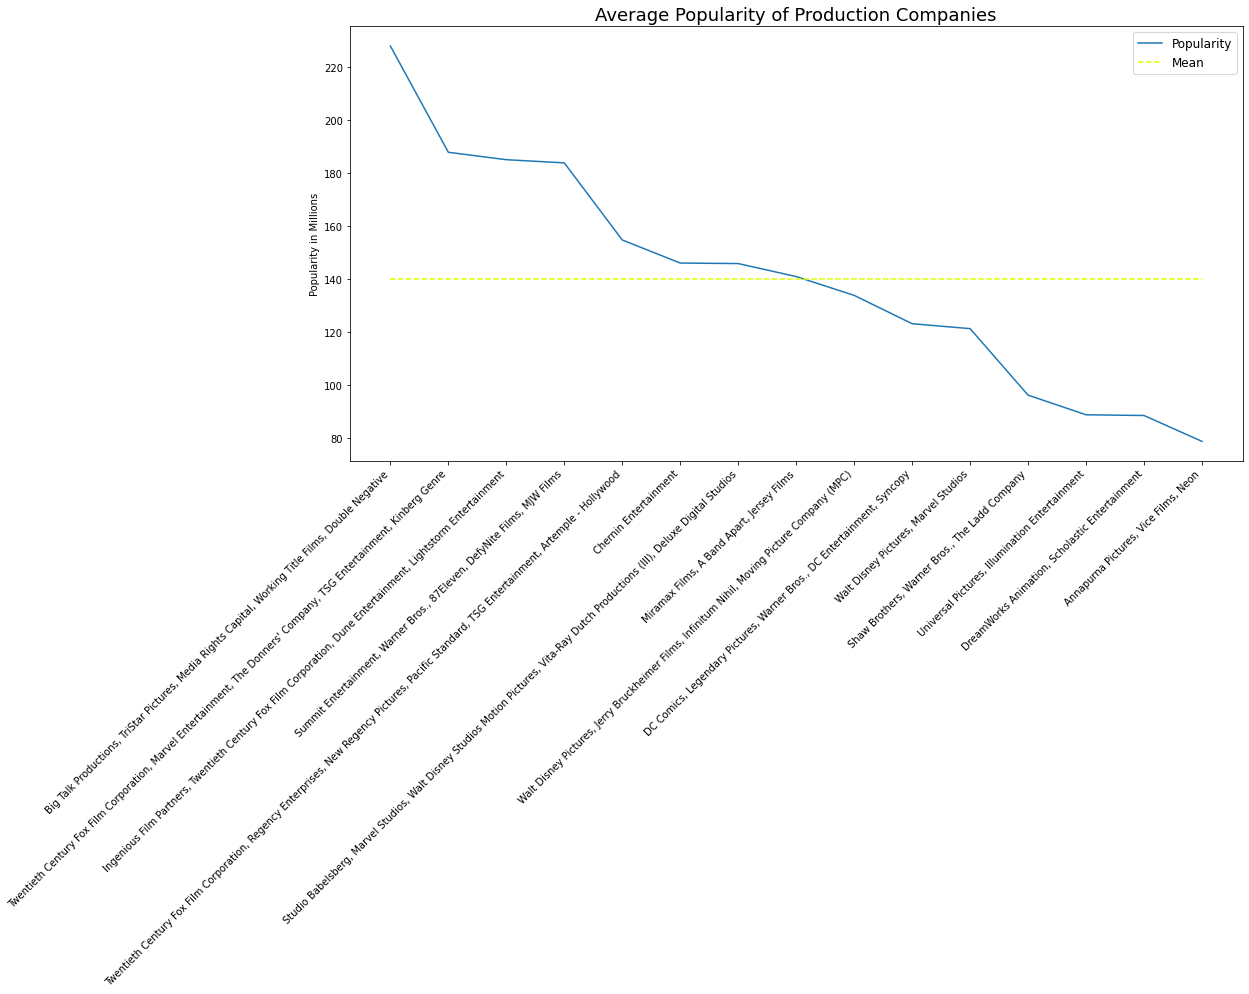

In [ ]:
# Visualizing the graph
plot_graph(
    production_popularity, "popularity",
    "Average Popularity of Production Companies",
    "Popularity in Millions", xticks="production_companies", inc_mean=True, legend_loc="upper right")

In [ ]:
# Count the Movies
# Find the minimum and Max values for release_year
# Sort using th movies count
top_production_companies = production_grouped \
    .agg({'original_title': 'count', 'year': ['min', 'max']}) \
    .sort_values(('original_title', 'count'), ascending=False).head(15)

<Figure size 432x288 with 0 Axes>

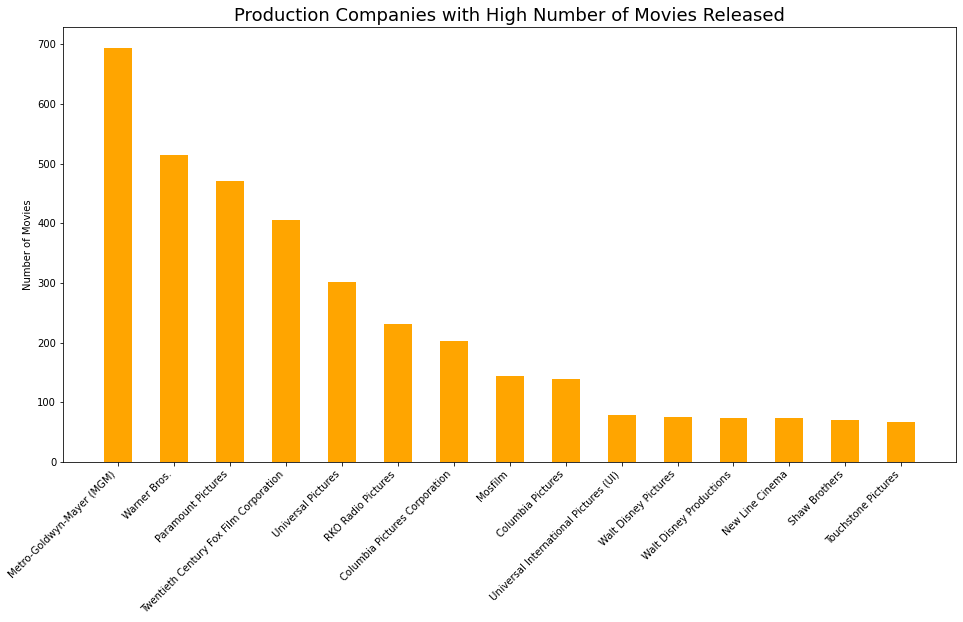

In [ ]:
plot_graph(
    top_production_companies.reset_index(), ('original_title', 'count'),
    "Production Companies with High Number of Movies Released",
    "Number of Movies", graph_type="bar", xticks="production_companies", width=0.5, color="orange")

In [ ]:
# retrieving the values from multi-index data frame and compute the ratio
movie_year_ratio = top_production_companies.apply(
    lambda x: x[('original_title', 'count')] / (x[('year', 'max')] - x[('year', 'min')]),
    axis=1)

<Figure size 432x288 with 0 Axes>

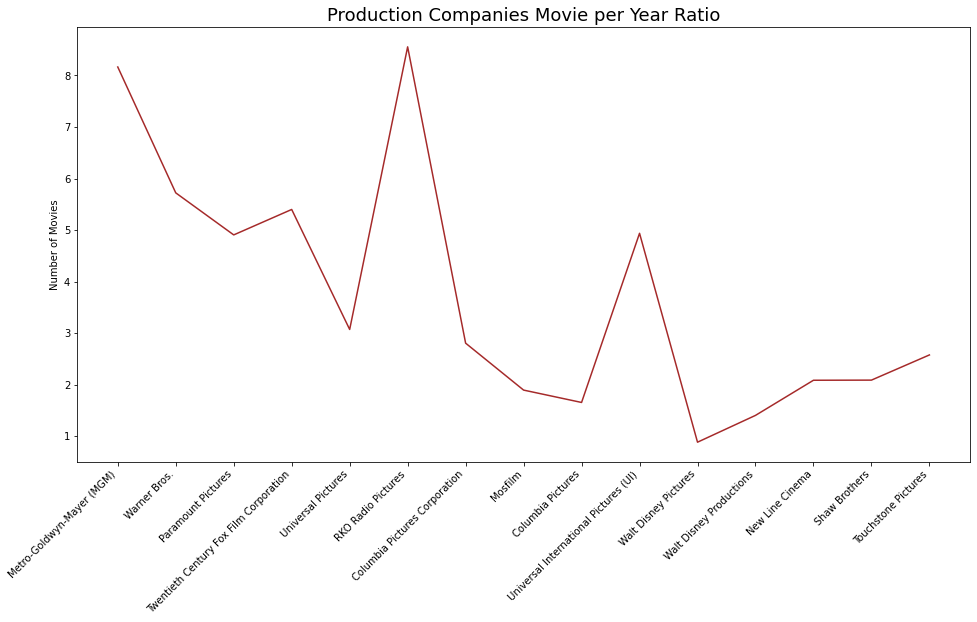

In [ ]:
plot_graph(
    movie_year_ratio.reset_index(), 0,
    "Production Companies Movie per Year Ratio",
    "Number of Movies", xticks="production_companies", color = "brown")